In [2]:
import numpy as np
from PIL import Image
import os

In [4]:
listing = os.listdir('images/')
len(listing)

60000

In [56]:
def load(path="images/"):
    '''
    INPUT:
    path            : the path of folder to be processed
    
    OUTPUT:
    X, Y
    '''
    if path[-1] != '/':
        path += '/'
    
    listing = os.listdir(path)
    
    X = np.zeros((60000, 784))
    Y = np.zeros((60000, 1))
    
    for i in range(len(listing)):
        img = Image.open('images/' + listing[i]).convert('L')
        arr = np.asarray(img)
        label = listing[i][-5]
        X[i] = arr.flatten()
        Y[i] = label    
    return X, Y
    
X, Y = load()

[0.]


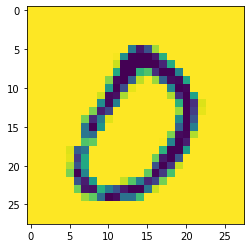

In [66]:
from matplotlib.pyplot import imshow

index = 300

%matplotlib inline
matrix = np.reshape(X[index], (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))
print(Y[index])

In [76]:
from sklearn.model_selection import train_test_split
xTr, xTe, yTr, yTe = train_test_split(X, Y, test_size=0.05)

xTr, xVa, yTr, yVa = train_test_split(xTr, yTr, test_size=0.02, random_state=1)

In [77]:
print(xTr.shape)
print(yTr.shape)
print(xVa.shape)
print(yVa.shape)
print(xTe.shape)
print(yTe.shape)

(55860, 784)
(55860, 1)
(1140, 784)
(1140, 1)
(3000, 784)
(3000, 1)
